# Importing Libraries

In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

#For interactive dashboard
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objs as go

# Read Data

In [51]:
df = pd.read_csv("House_Rent_Dataset.csv")
df


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# Exploratory Data Analysis

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [38]:
# Function to extract the first word (number) from the 'Floor' column
def extract_floor(floor_str):
  if 'Ground' in floor_str:
      return 0
  if 'Lower' in floor_str:
      return -2
  if 'Upper' in floor_str:
      return -1
  try:
      return int(floor_str.split()[0])
  except ValueError:
      return -1  # Return -1 for invalid or unknown values

# Apply the function to the 'Floor' column
df['Floor'] = df['Floor'].apply(extract_floor)

In [39]:

#Summary Statistics
df.describe()

,BHK,Rent,Size,Floor,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,3.436157,1.965866
std,0.832256,7.810641e+04,634.202328,5.773950,0.884532
min,1.000000,1.200000e+03,10.000000,-2.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,3.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,76.000000,10.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['BHK'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['Rent'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['Size'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['Floor'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['BHK'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['Rent'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['Size'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_16, *['Floor'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_17, *[[['BHK', 'Rent'], ['Rent', 'Size'], ['Size', 'Floor'], ['Floor', 'Bathroom']]], **{})
chart

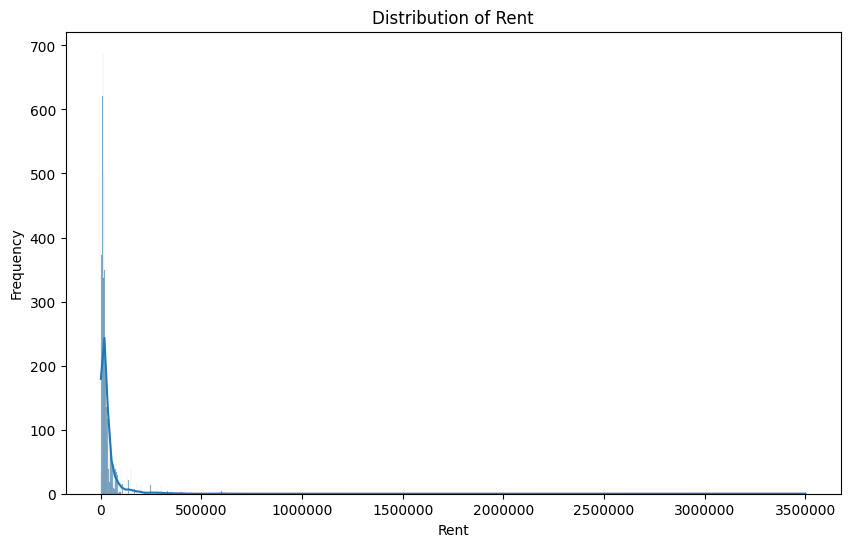

In [47]:
#Univariate Analysis
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
sns.histplot(df['Rent'], kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

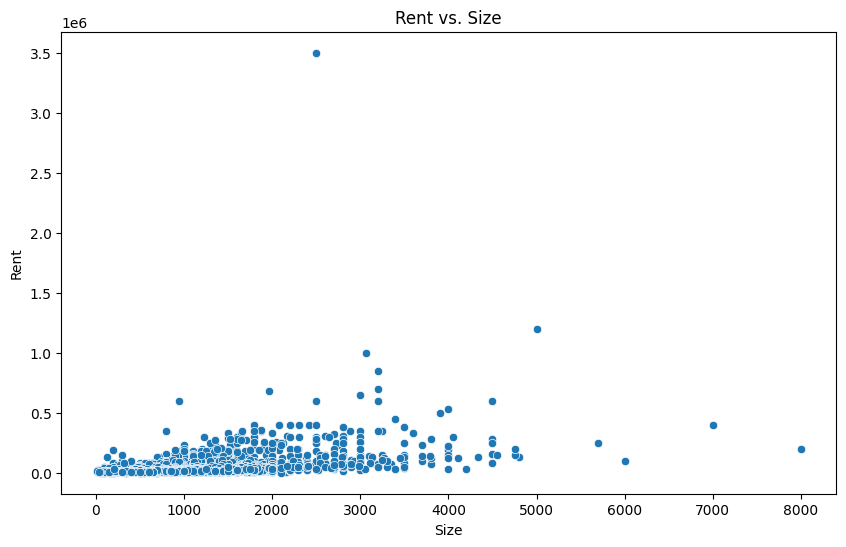

In [50]:
#Bi-variate analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rent', data=df)
plt.title('Rent vs. Size')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()

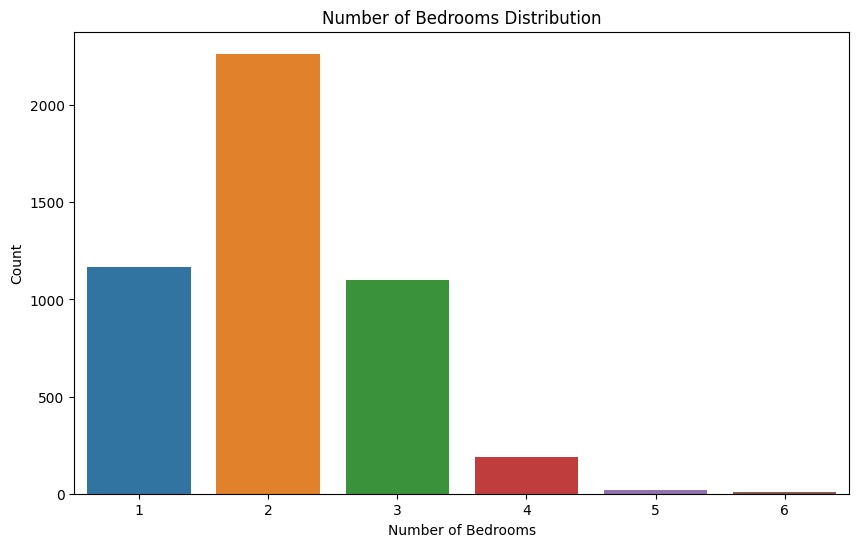

In [52]:
#Categorical Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='BHK', data=df)
plt.title('Number of Bedrooms Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()


<ipython-input-53-ba43ce19e042>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


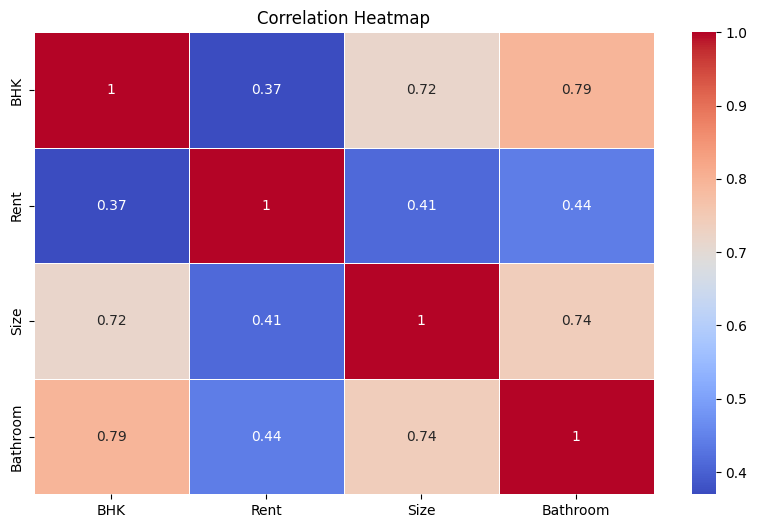

In [53]:
#Multivariate Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Machine Learning Model

In [17]:
X = df[['BHK', 'Size', 'Floor', 'Bathroom']]
y = df[['Rent']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3796, 4), X Type:<class 'pandas.core.frame.DataFrame'>)
      BHK  Size  Floor  Bathroom
1995    2   950      6         2
1497    2   800      3         2
2763    1   545      2         1
1351    1   465      3         1
1862    2   900      4         2
...   ...   ...    ...       ...
4426    3  1500      1         3
466     3  1200      3         2
3092    2   800     13         2
3772    3  3500      0         3
860     1   450      5         2

[3796 rows x 4 columns]
y Shape: (3796, 1), y Type:<class 'pandas.core.frame.DataFrame'>)
       Rent
1995  23500
1497  10500
2763  19000
1351  20000
1862  17000
...     ...
4426  25000
466   20000
3092  20000
3772  85000
860   25000

[3796 rows x 1 columns]


In [20]:
#Model
model = LinearRegression()

In [21]:
#Model fitting
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Dashboard to Predict Annual Rent of Houses based on User Inputs

In [57]:
# Create input widgets for user input
num_bedrooms_input = widgets.IntText(description='Number of Bedrooms:')
square_feet_input = widgets.IntText(description='Square Feet:')
floor_input = widgets.IntText(description='Floor:')
num_bathrooms_input = widgets.IntText(description='Number of Bathrooms:')
predict_button = widgets.Button(description='Predict Rent')

output_text = widgets.Label()
prediction_chart = go.FigureWidget(data=[{'type': 'bar', 'x': ['Predicted Rent'], 'y': [0]}])

# Function to make predictions and update the chart
def predict_rent(b):
    num_bedrooms = num_bedrooms_input.value
    square_feet = square_feet_input.value
    floor = floor_input.value
    num_bathrooms = num_bathrooms_input.value

    # Prepare user input as a DataFrame
    input_data = pd.DataFrame({"BHK": [num_bedrooms],
                               "Size": [square_feet],
                               "Floor": [floor],
                               "Bathroom": [num_bathrooms]})

    # Make the prediction
    prediction = model.predict(input_data)[0]

    # Update the chart with the prediction
    prediction_chart.data[0]['y'] = [prediction]
    prediction_chart.update_layout(title='Rent Prediction')

    # Update the output text
    output_text.value = f'Predicted Rent: ${float(prediction):.2f}'

# Bind the predict_rent function to the button click event
predict_button.on_click(predict_rent)

# Display widgets
display(num_bedrooms_input, square_feet_input, floor_input, num_bathrooms_input, predict_button)
display(output_text)
display(prediction_chart)

IntText(value=0, description='Number of Bedrooms:')

IntText(value=0, description='Square Feet:')

IntText(value=0, description='Floor:')

IntText(value=0, description='Number of Bathrooms:')

Button(description='Predict Rent', style=ButtonStyle())

Label(value='')

FigureWidget({
    'data': [{'type': 'bar', 'uid': '3fa545d9-6034-4a84-89f5-e3a53b89c067', 'x': ['Predicted Rent'], 'y': [0]}],
    'layout': {'template': '...'}
})